# $$\text{Compte rendu: calcul scientifique et traitement des données}$$
 
## $$\text{TP2: Prise en main des packages numpy et matplotlib}\\  
\text{  Minimisation d’une fonction d’une variable}$$

## 1.Recherche d'un minimum d'une fonction par la méthode de dichotomie


Text(1, -5, 'Precision = 0.1\nCV en 7 iterations\nBorne inférieure :\n  x_min = -1.4688\n  y_min = -6.7439\nBorne supérieure :\n  x_max = -1.4062\n  y_max = -6.7404')

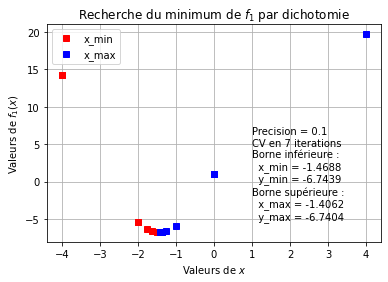

In [1]:
#définition de la fonction f1
def f1(x) :
    return (x+1)**2 + 7*np.sin(x)

import numpy as np
import matplotlib.pyplot as plt
x_min = -4
x_max = +4

f = f1
precision = 1e-1
# METHODE minimumDichotomie 
def minimumDichotomie(f,x_min,x_max,precision):
    x1=x_min
    x5=x_max

    #les bornes
    bornes_min=np.array([[x1],[f(x1)]])
    bornes_max=np.array([[x5],[f(x5)]])    
    
    #dichotomie
    cmpt=0
    while  x5-x1>precision and cmpt<100:
         
         x3=(x1+x5)/2
         x2=(x1+x3)/2
         x4=(x3+x5)/2
         
         val_f1=np.array([f(x1),f(x2),f(x3),f(x4),f(x5)])
         
         if val_f1[0]<val_f1[1]<val_f1[2]<val_f1[3]<val_f1[4]:
             x5=x2
             cmpt+=1
         elif val_f1[0]>val_f1[1]<val_f1[2]<val_f1[3]<val_f1[4]:
             x5=x3
             cmpt+=1
         elif val_f1[0]>val_f1[1]>val_f1[2]<val_f1[3]<val_f1[4]:
             x1=x2
             x5=x4
             cmpt+=1
         elif val_f1[0]>val_f1[1]>val_f1[2]>val_f1[3]<val_f1[4]:
             x1=x3
             cmpt+=1
         elif val_f1[0]>val_f1[1]>val_f1[2]>val_f1[3]>val_f1[4]:
             x1=x4
             cmpt+=1
         else:
             print('fonction non unimodale')
             return [x_min,f(x_min)],[x_max,f(x_max)],cmpt,False
         bornes_min=np.concatenate((bornes_min,[[x1],[f(x1)]]),axis=1)
         bornes_max=np.concatenate((bornes_max,[[x5],[f(x5)]]),axis=1)
            
    return bornes_min,bornes_max,cmpt,x5-x1<=precision
        
#appel de la fonction de dichotomie       
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f,x_min,x_max,precision)
#intervalle final
x_min, y_min = bornes_min[0][n_iter], bornes_min[1][n_iter]
x_max, y_max = bornes_max[0][n_iter], bornes_max[1][n_iter]
# Visualisation des résultats
plt.plot(bornes_min[0],bornes_min[1],'rs', label = 'x_min')
plt.plot(bornes_max[0],bornes_max[1],'bs', label = 'x_max')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $f_1(x)$')
plt.title('Recherche du minimum de $f_1$ par dichotomie')
plt.grid()

message = 'Precision = {}'.format(precision)
message += '\nCV en {} iterations'.format(n_iter)
message += '\nBorne inférieure :'
message += '\n  x_min = {:6.4f}'.format(x_min)
message += '\n  y_min = {:6.4f}'.format(y_min)
message += '\nBorne supérieure :'
message += '\n  x_max = {:6.4f}'.format(x_max)
message += '\n  y_max = {:6.4f}'.format(y_max)
plt.text(1,-5,message)

In [2]:
#test de la méthode de dichotomie pour différentes précisions
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f1,-4,4,0.2)
print("nombre d'itérations pour une précision de 0.2: ", n_iter)
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f1,-4,4,0.01)
print("nombre d'itérations pour une précision de 0.01: ",n_iter)
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f1,-4,4,1e-5)
print("nombre d'itérations pour une précision de 1e-5: ",n_iter)
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f1,-4,4,1e-8)


nombre d'itérations pour une précision de 0.2:  6
nombre d'itérations pour une précision de 0.01:  10
nombre d'itérations pour une précision de 1e-5:  20
fonction non unimodale


on remaque que plus on  a une meilleurs précision, plus le nombre d'itérations augmente.
par contre, à partir d'une certaine précision, notre fonction est considéré comme non unimodale(limite de calcul du programme)

In [3]:
#définiton de la fonction f2
def f2(x) :
    return (x+1)**2 + 10*np.sin(x)


In [4]:
#test de la méthode de dichotomie pour f2
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f2,-4,4,0.1)

fonction non unimodale


la précaution à prendre est de s'assurer que notre fonction est bien unimodale sur l'interval de départ.

le calcul du minimum pour certaine fonction peut être très couteux, ce qui se traduit par un nombre d'itérations très grand, pour éviter cette situation il faudra juste ajouter un compteur pour limiter le nombre d'itérations.

## 2.Recherche d'un minimum d'une fonction par la méthode de Newton 

In [5]:
#METHODE DE NEWTON
def newton(f,d1f,d2f,x0,eps,n_iter):
    uN=eps+1
    cmpt=0
    while d2f(x0)!= 0 and abs(uN)>eps and cmpt<n_iter:
        uN=d1f(x0)/d2f(x0)
        x0-=uN
        cmpt+=1
    return x0,cmpt,abs(uN)>eps

In [6]:
##première derivée de f1
def d1f1(x):
    return 2*(x+1)+7*np.cos(x)

#deuxième derivée de f1
def d2f1(x):
    return 2-7*np.sin(x)

In [7]:
#test de la fonction newton pour différentes précision et différents point de départ
#x0=0.5 eps=0.1
x,nb_iter,err=newton(f1,d1f1,d2f1,0.5,0.1,1000)
print(x,nb_iter,err)

#x0=0.5 eps=0.0001
x,nb_iter,err=newton(f1,d1f1,d2f1,0.5,0.0001,1000)
print(x,nb_iter,err)

#x0=0 eps=0.1
x,nb_iter,err=newton(f1,d1f1,d2f1,0,0.1,1000)
print(x,nb_iter,err)

#x0=8
x,nb_iter,err=newton(f1,d1f1,d2f1,8,0.1,1000)
print(x,nb_iter,err)

-1.4436950579273564 36 False
-1.4436866942208746 37 False
-1.4436866971109932 30 False
7.8496313753942815 1000 True


- on remarque que plus la précision est meilleur, plus le nobre d'itérations augmente.
- selon le point de départ, plus on est loins de la solution, plus le nombre d'itérations augmente.
- si la valeur de départ est très éloignée de la solution, cela implique un nombre d'itérations très grand, au final on n'aura pas de solution dû au dépassenemnt du nombre d'itérations maximum imposé. 

## 3.Analyse comparative de la méthode de dichotomie et de la méthode de Newton.

- Pour appliquer la méthode de dichotomie ou Newton sur quelconque fonction, il faut que cette dernière respecte certains critères:
 - Pour la dichotomie: la fonction doit être unimodale sur l'intervalle de calcul, la méthode nous donne un intervalle contenant minimum.Cette méthode est moins rapide que la méthode de Newton mais plus sûre.
 - Pour la méthode de Newton: la fonction doit être convexe, la méthode nous donne une valeur approchée de la solution(le minimum).Il faut bien choisir un point de départ relativement proche de las solution et connaître la première et deuxième derivée de notre fonction. 